In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.spatial.distance import euclidean
import cv2
from google.colab.patches import cv2_imshow
from scipy.spatial import ConvexHull
from scipy.stats import pearsonr

In [ ]:
df_lm=pd.read_csv('A002_02_BBP_NORMAL_color.txt')
df_lm.head()

,Frame,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x64,y64,x65,y65,x66,y66,x67,y67,x68,y68
0,159,192.072072,216.756757,185.405405,231.531532,182.702703,247.567568,183.809524,265.000000,188.095238,...,271.531532,262.342342,284.355917,269.031850,270.810811,264.684685,258.738739,263.243243,246.486486,263.063063
1,446,192.380952,220.000000,186.190476,236.666667,185.000000,253.809524,186.190476,273.571429,190.000000,...,275.675676,263.963964,285.765766,274.774775,272.972973,273.153153,259.819820,271.711712,247.027027,270.090090
2,455,190.952381,223.095238,185.952381,236.666667,184.523810,253.809524,185.045045,270.630631,189.047619,...,272.792793,268.288288,287.747748,272.792793,273.333333,265.945946,260.540541,265.945946,248.648649,265.585586
3,476,190.238095,221.666667,185.714286,236.428571,184.285714,254.285714,185.238095,273.095238,189.285714,...,274.774775,271.711712,287.207207,280.720721,273.153153,280.000000,260.360360,278.378378,247.747748,277.117117
4,184,189.761905,217.380952,185.952381,234.761905,185.000000,251.428571,187.380952,270.238095,192.857143,...,265.714286,257.619048,274.523810,262.380952,266.190476,264.285714,258.809524,265.000000,250.238095,263.333333


In [ ]:
distances = np.sqrt((df_lm[' x31'] - df_lm[' x58'])**2 + (df_lm[' y31'] - df_lm[' y58'])**2)
LLpath = distances.sum()
cap = cv2.VideoCapture('/content/A002_02_BBP_NORMAL_color.avi')
for index,row in df_lm.iterrows():
  frame_no = int(row['Frame'])
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
  ret, frame = cap.read()
  cv2.line(frame,(int(row[' x31']),int(row[' y31'])),(int(row[' x58']),int(row[' y58'])),(0,0,255),2)
  print(f"Displaying frame {frame_no}")
  cv2_imshow(frame)
  cv2.waitKey(20)

cap.release()
print("LLpath:", LLpath)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
distances = np.sqrt((df_lm[' x31'] - df_lm[' x58'])**2 + (df_lm[' y31'] - df_lm[' y58'])**2)
LLpath = distances.sum()
print("LLpath:", LLpath)


LLpath: 845.9781818806489


In [ ]:
cap = cv2.VideoCapture('/content/A002_02_BBP_NORMAL_color.avi')
area = []
df_lm.columns = df_lm.columns.str.strip()

for index, row in df_lm.iterrows():
    frame_no = int(row['Frame'])
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
    ret, frame = cap.read()
    points = np.array([
        (row['x61'], row['y61']),
        (row['x62'], row['y62']),
        (row['x63'], row['y63']),
        (row['x64'], row['y64']),
        (row['x65'], row['y65']),
        (row['x66'], row['y66']),
        (row['x67'], row['y67']),
        (row['x68'], row['y68'])
    ], dtype=np.int32)
    points = points.reshape((-1, 1, 2))

    cv2.fillPoly(frame, [points], (255, 255, 255))
    print(f"Displaying frame {frame_no}")
    cv2_imshow(frame)
    cv2.waitKey(20)

    hull = ConvexHull(points[:, 0, :])  # Pass 2D points
    area.append(hull.volume)

cap.release()

print("Area of polygons:", area)
print("Range of area:", max(area) - min(area))
print("Mean of area:", np.mean(area))


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#symmentry
cap=cv2.VideoCapture('/content/A002_02_BBP_NORMAL_color.avi')
Larea=[]
Rarea=[]
for index,row in df_lm.iterrows():
  frame_no=int(row['Frame'])
  cap.set(cv2.CAP_PROP_POS_FRAMES,frame_no)
  ret,frame=cap.read()
  Larea.append(0.5 * abs((int(row['x52'])*(int(row['y55'])-(int(row['y58']))))+(int(row['x55'])*(int(row['y58'])-(int(row['x52']))))+(int(row['x58'])*(int(row['y52'])-(int(row['y55']))))))
  Rarea.append(0.5 * abs((int(row['x52'])*(int(row['y49'])-(int(row['y58']))))+(int(row['x49'])*(int(row['y58'])-(int(row['x52']))))+(int(row['x58'])*(int(row['y52'])-(int(row['y49']))))))
  cv2.line(frame,(int(row['x52']),int(row['y52'])),(int(row['x58']),int(row['y58'])),(0,0,255),2)
  cv2.line(frame,(int(row['x52']),int(row['y52'])),(int(row['x55']),int(row['y55'])),(0,0,255),2)
  cv2.line(frame,(int(row['x55']),int(row['y55'])),(int(row['x58']),int(row['y58'])),(0,0,255),2)
  cv2.line(frame,(int(row['x49']),int(row['y49'])),(int(row['x58']),int(row['y58'])),(0,0,255),2)
  cv2.line(frame,(int(row['x49']),int(row['y49'])),(int(row['x52']),int(row['y52'])),(0,0,255),2)
  points1=np.array([(int(row['x52']),int(row['y52'])),(int(row['x58']),int(row['y58'])),(int(row['x55']),int(row['y55']))])
  points2=np.array([(int(row['x52']),int(row['y52'])),(int(row['x58']),int(row['y58'])),(int(row['x49']),int(row['y49']))])
  cv2.fillPoly(frame,[points1],(255,255,255))
  cv2.fillPoly(frame,[points2],(200,0,0))
  cv2_imshow(frame)
  cv2.waitKey(20)

cap.release()
Adiff=abs(np.mean(Larea)-np.mean(Rarea))
print(Adiff)



Output hidden; open in https://colab.research.google.com to view.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.DataFrame()
df['W'] = np.sqrt((df_lm['x49'] - df_lm['x55'])**2 + (df_lm['y49'] - df_lm['y55'])**2)  # Mouth width
df['LLdisp'] = np.sqrt((df_lm['x52'] - df_lm['x58'])**2 + (df_lm['y52'] - df_lm['y58'])**2)
df['vW'] = df['W'].diff()
df['vLL'] = df['LLdisp'].diff()

df['e']=np.sqrt(1-df['LLdisp']**2/df['W']**2)
print("Frame-wise calculations:")
print(df[['W', 'LLdisp', 'vW', 'vLL','e']])
vWmax = df['vW'].max()
vWmin = df['vW'].min()
vLLmax = df['vLL'].max()
vLLmin = df['vLL'].min()

print("Features:")
print(f"vWmax (Max velocity of mouth width): {vWmax}")
print(f"vWmin (Min velocity of mouth width): {vWmin}")
print(f"vLLmax (Max velocity of LL displacement): {vLLmax}")
print(f"vLLmin (Min velocity of LL displacement): {vLLmin}")
print(f"range of e: {max(df['e'])-min(df['e'])}")
print(f"mean of e: {np.mean(df['e'])}")


Frame-wise calculations:
            W     LLdisp         vW        vLL         e
0   66.236746  11.898586        NaN        NaN  0.983733
1   67.473328  22.805430   1.236582  10.906844  0.941149
2   68.756777  14.347819   1.283449  -8.457611  0.977985
3   71.033965  24.182436   2.277188   9.834617  0.940268
4   60.531471  20.050955 -10.502494  -4.131480  0.943544
5   67.128502  20.488645   6.597032   0.437690  0.952283
6   71.808908  14.555002   4.680406  -5.933644  0.979243
7   75.724767  23.106281   3.915859   8.551279  0.952309
8   68.894740  16.095661  -6.830027  -7.010620  0.972326
9   64.320978  26.196969  -4.573762  10.101308  0.913301
10  74.515061  24.165201  10.194083  -2.031768  0.945954
11  70.582288  16.946628  -3.932773  -7.218572  0.970749
12  72.807717  21.223890   2.225429   4.277262  0.956569
13  65.746197  15.759315  -7.061521  -5.464575  0.970847
14  64.867299  25.768241  -0.878898  10.008926  0.917712
Features:
vWmax (Max velocity of mouth width): 10.1940831197736

In [ ]:
cap=cv2.VideoCapture('/content/A002_02_BBP_NORMAL_color.avi')
df_lm.columns = df_lm.columns.str.strip()
df_lm1=df_lm.astype(int)
for index, row in df_lm1.iterrows():
  if index==0:
    continue
  frame_no = row['Frame']
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
  ret, frame = cap.read()
  x1_cr, y1_cr = df_lm1.loc[df_lm1['Frame'] == frame_no, ['x52', 'y52']].values[0]
  x2_cr, y2_cr = df_lm1.loc[df_lm1['Frame'] == frame_no, ['x58', 'y58']].values[0]
  x3_cr, y3_cr = df_lm1.loc[df_lm1['Frame'] == frame_no, ['x49', 'y49']].values[0]
  x4_cr, y4_cr = df_lm1.loc[df_lm1['Frame'] == frame_no, ['x55', 'y55']].values[0]

  x1_prev, y1_prev = df_lm1.loc[df_lm1['Frame'] == df_lm1['Frame'][index-1], ['x52', 'y52']].values[0]
  x2_prev, y2_prev = df_lm1.loc[df_lm1['Frame'] == df_lm1['Frame'][index-1], ['x58', 'y58']].values[0]
  x3_prev, y3_prev = df_lm1.loc[df_lm1['Frame'] == df_lm1['Frame'][index-1], ['x49', 'y49']].values[0]
  x4_prev, y4_prev = df_lm1.loc[df_lm1['Frame'] == df_lm1['Frame'][index-1], ['x55', 'y55']].values[0]



  cv2.line(frame,(x1_cr,y1_cr),(x2_cr,y2_cr),(0,0,255),2)
  cv2.line(frame,(x3_cr,y3_cr),(x4_cr,y4_cr),(0,0,255),2)
  cv2.line(frame,(x1_prev,y1_prev),(x2_prev,y2_prev),(255,0,255),2)
  cv2.line(frame,(x3_prev,y3_prev),(x4_prev,y4_prev),(255,0,255),2)
  cv2_imshow(frame)
  cv2.waitKey(0)

cap.release()




Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from scipy.stats import pearsonr


# Calculate displacements
df['disp_RC'] = np.sqrt((df_lm['x49'] - df_lm['x31'])**2 + (df_lm['y49'] - df_lm['y31'])**2)
df['disp_LC'] = np.sqrt((df_lm['x55'] - df_lm['x31'])**2 + (df_lm['y55'] - df_lm['y31'])**2)

# Calculate Pearson's correlation coefficient
r_symm, _ = pearsonr(df['disp_RC'], df['disp_LC'])

# Display results
print("Frame-wise Displacements:")
print(df[['disp_RC', 'disp_LC']])
print(f"\nSymmetry Index (r_symm): {r_symm:.4f}")


Frame-wise Displacements:
      disp_RC    disp_LC
0   65.468850  63.257318
1   68.806421  69.037465
2   63.439770  63.679262
3   67.749053  70.975525
4   56.967986  56.541478
5   64.109105  62.292740
6   61.954650  62.489908
7   67.495276  68.809524
8   62.506689  62.843162
9   58.751658  60.160877
10  66.674319  67.955234
11  60.330251  63.435739
12  66.865350  66.165206
13  60.945870  59.842954
14  60.571728  62.080794

Symmetry Index (r_symm): 0.9154


In [8]:
import os
import cv2
import pandas as pd

# Initialize lists and DataFrame
area = []
frames = []
subject_ids = []
Arest = pd.DataFrame()

base_dir = "/content/drive/MyDrive/neuro_data/Neuroface"
categories = ["HC", "PS", "ALS"]

for category in categories:
    landmark_dir = os.path.join(base_dir, category, "Landmarks_gt")
    video_dir = os.path.join(base_dir, category, "Videos")  # Directory containing videos/images

    for file_name in os.listdir(landmark_dir):
        if file_name.endswith(".txt"):
            parts = file_name.split('_')
            if len(parts) >= 4:
                task_name = parts[3].upper()
                subject_id = parts[0]

                if task_name == 'KISS':
                    file_path = os.path.join(landmark_dir, file_name)

                    # Read the landmarks
                    df = pd.read_csv(file_path,nrows=1)
                    df.columns = df.columns.str.strip()

                    # Load corresponding video/image file
                    video_file = os.path.join(video_dir, f"{subject_id}_02_NSM_KISS_color.avi")  # Example naming convention
                    if not os.path.exists(video_file):
                        print(f"Video for {subject_id}_{task_name} not found.")
                        continue

                    cap = cv2.VideoCapture(video_file)
                    for index, row in df.iterrows():
                        # Calculate area
                        calculated_area = (0.5 * abs(
                            (row['x52'] * (row['y55'] - row['y58'])) +
                            (row['x55'] * (row['y58'] - row['y52'])) +
                            (row['x58'] * (row['y52'] - row['y55']))
                        )) + (0.5 * abs(
                            (row['x52'] * (row['y49'] - row['y58'])) +
                            (row['x49'] * (row['y58'] - row['y52'])) +
                            (row['x58'] * (row['y52'] - row['y49']))
                        ))

                        area.append(calculated_area)
                        frames.append(index)  # Save frame index
                        subject_ids.append(subject_id)

                        # Seek to the specific frame
                        cap.set(cv2.CAP_PROP_POS_FRAMES, index)
                        ret, frame = cap.read()
                        if not ret:
                            print(f"Frame {index} not found in {video_file}.")
                            continue

                        # Display the frame
                        print(f"Frame {index} - {subject_id}")
                        cv2_imshow(frame)
                        key = cv2.waitKey(0)  # Wait for a key press to continue
                        if key == ord('q'):  # Quit visualization on 'q' press
                            break

                    cap.release()
                    cv2.destroyAllWindows()

# Create a DataFrame
Arest = pd.DataFrame({
    'Subject_ID': subject_ids,
    'Frame': frames,
    'Area': area
})

print(Arest)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
area=[]
Arest = pd.DataFrame()
base_dir = "/content/drive/MyDrive/neuro_data/Neuroface"
categories = ["HC", "PS", "ALS"]

for category in categories:
    landmark_dir = os.path.join(base_dir, category, "Landmarks_gt")

    for file_name in os.listdir(landmark_dir):
        if file_name.endswith(".txt"):
            parts = file_name.split('_')
            if len(parts) >= 4:
                task_name = parts[3].upper()
                subject_id = parts[0]
                if task_name == 'KISS':
                  file_path = os.path.join(landmark_dir, file_name)
                  df = pd.read_csv(file_path,nrows=1)
                  df.columns=df.columns.str.strip()
                  for index, row in df.iterrows():
                      area.append((0.5 * abs(
                          (row['x52'] * (row['y55'] - row['y58'])) +
                          (row['x55'] * (row['y58'] - row['y52'])) +
                          (row['x58'] * (row['y52'] - row['y55']))
                      ))+(0.5 * abs(
                          (row['x52'] * (row['y49'] - row['y58'])) +
                          (row['x49'] * (row['y58'] - row['y52'])) +
                          (row['x58'] * (row['y52'] - row['y49']))
                      )))


                # Add the frame count to df_frame as a new row
                # Arest = pd.concat([Arest, pd.DataFrame({'Subject_ID':[subject_id],'Arest':[area]})],ignore_index=True)
print(area)


[778.6527201760632, 518.031157222797, 454.16666666666674, 544.5578231292518, 624.4947650353058, 199.79379219954785, 281.308335362389, 667.26494834603, 234.41043083900354, 822.7903579254914, 432.69080997727383, 494.0541440297038, 872.1532343153972, 744.1928414901379, 422.52328859472055, 1383.1994156318488, 309.0419501133797, 923.8048859670471, 726.4630238266253, 381.8196574953329, 513.8659320477516, 505.93295998701365, 915.2815335616845, 808.7633087633094, 414.18732782369256, 146.2373183994805, 524.2346938775511, 580.1639477315164, 589.15672429186, 309.81695717474076, 499.11208505802927, 505.41352162973726, 714.3085891702837, 458.7640203952586, 250.24348672997473, 310.3968833698576]


In [ ]:
Arest.columns

Index(['Subject_ID', 'Frame', 'Area'], dtype='object')

In [9]:
Arest.reset_index(drop=True,inplace=True)
Arest=Arest.set_index('Subject_ID')
Arest.drop(columns='Frame')

,Area
Subject_ID,
N002,778.652720
N003,518.031157
N001,454.166667
N011,544.557823
N010,624.494765
N008,199.793792
N017,281.308335
N004,667.264948
N019,234.410431


In [10]:
import os
import pandas as pd
import numpy as np
from scipy.spatial import ConvexHull
from scipy.stats import pearsonr

# Functions
def calculate_LLpath(df_lm):
    distances = np.sqrt((df_lm['x31'] - df_lm['x58'])**2 + (df_lm['y31'] - df_lm['y58'])**2)
    LLpath = distances.sum()
    return LLpath

# def calculate_area(df_lm):
#     area = []
#     for index, row in df_lm.iterrows():
#         points = np.array([
#             (row['x61'], row['y61']),
#             (row['x62'], row['y62']),
#             (row['x63'], row['y63']),
#             (row['x64'], row['y64']),
#             (row['x65'], row['y65']),
#             (row['x66'], row['y66']),
#             (row['x67'], row['y67']),
#             (row['x68'], row['y68'])
#         ], dtype=np.int32)
#         unique_points = np.unique(points, axis=0)


#         if len(unique_points) < 3:
#             area.append(0)
#             continue

#         if np.linalg.matrix_rank(unique_points - unique_points[0]) < 2:
#             area.append(0)  # Default area for degenerate cases
#             continue

#         # Compute ConvexHull
#         try:
#             hull = ConvexHull(unique_points)
#             area.append(hull.volume)  # ConvexHull.volume gives area in 2D
#         except Exception as e:
#             print(f"Error computing ConvexHull: {e}")
#             area.append(0)

#     range_area = max(area) - min(area) if area else 0
#     mean_area = np.mean(area) if area else 0
#     return range_area, mean_area

def calculate_Area(df_lm,Arest,subject_id):
    area=[]
    for index, row in df_lm.iterrows():
        area.append((((0.5 * abs(
            (row['x52'] * (row['y55'] - row['y58'])) +
            (row['x55'] * (row['y58'] - row['y52'])) +
            (row['x58'] * (row['y52'] - row['y55']))
        ))+(0.5 * abs(
            (row['x52'] * (row['y49'] - row['y58'])) +
            (row['x49'] * (row['y58'] - row['y52'])) +
            (row['x58'] * (row['y52'] - row['y49']))
        ))-Arest['Area'][subject_id])/Arest['Area'][subject_id])*100)
    Amean=np.mean(area)
    Arange=max(area)-min(area)
    return Amean,Arange

def calculate_Adiff(df_lm):
    Adiff=[]
    for index, row in df_lm.iterrows():
      Adiff.append(0.5*abs(
            (row['x52'] * (row['y55'] - row['y58'])) +
            (row['x55'] * (row['y58'] - row['y52'])) +
            (row['x58'] * (row['y52'] - row['y55']))
        )-(0.5 * abs(
            (row['x52'] * (row['y49'] - row['y58'])) +
            (row['x49'] * (row['y58'] - row['y52'])) +
            (row['x58'] * (row['y52'] - row['y49'])))))
    Adiff=np.mean(Adiff)
    return Adiff

def calculate_framewise_features(df_lm):
    df = pd.DataFrame()
    df['W'] = np.sqrt((df_lm['x49'] - df_lm['x55'])**2 + (df_lm['y49'] - df_lm['y55'])**2)
    df['LLdisp'] = np.sqrt((df_lm['x52'] - df_lm['x58'])**2 + (df_lm['y52'] - df_lm['y58'])**2)
    df['vW'] = df['W'].diff()
    df['vLL'] = df['LLdisp'].diff()
    df['e'] = np.sqrt(1 - (df['LLdisp']**2 / df['W']**2))

    vWmax = df['vW'].max()
    vWmin = df['vW'].min()
    vLLmax = df['vLL'].max()
    vLLmin = df['vLL'].min()
    range_e = max(df['e']) - min(df['e'])
    mean_e = np.mean(df['e'])

    return vWmax, vWmin, vLLmax, vLLmin, range_e, mean_e

def calculate_symmetry_index(df_lm):
    disp_RC = np.sqrt((df_lm['x49'] - df_lm['x31'])**2 + (df_lm['y49'] - df_lm['y31'])**2)
    disp_LC = np.sqrt((df_lm['x55'] - df_lm['x31'])**2 + (df_lm['y55'] - df_lm['y31'])**2)
    r_symm, _ = pearsonr(disp_RC, disp_LC)
    return r_symm

# Main computation
def compute_features(df_lm,Arest ,subject_id, disease_type):
    LLpath = calculate_LLpath(df_lm)
    Amean,Arange= calculate_Area(df_lm,Arest,subject_id)
    Adiff = calculate_Adiff(df_lm)
    vWmax, vWmin, vLLmax, vLLmin, range_e, mean_e = calculate_framewise_features(df_lm)
    r_symm = calculate_symmetry_index(df_lm)

    # Store results in a DataFrame
    result = pd.DataFrame([{
        'LLpath': LLpath,
        'Arange': Arange,
        'Amean': Amean,
        'Adiff': Adiff,
        'vWmax': vWmax,
        'vWmin': vWmin,
        'vLLmax': vLLmax,
        'vLLmin': vLLmin,
        'range_of_e': range_e,
        'mean_of_e': mean_e,
        'r_symm': r_symm,
        'disease_type': disease_type
    }])

    return result

base_dir = "/content/drive/MyDrive/neuro_data/Neuroface"
categories = ["HC","ALS","PS"]


final_results = pd.DataFrame()

for category in categories:
    landmark_dir = os.path.join(base_dir, category, "Landmarks_gt")
    for file_name in os.listdir(landmark_dir):
        file_path = os.path.join(landmark_dir, file_name)
        if file_name.endswith(".txt"):
          parts = file_name.split('_')
          if len(parts) >= 4:
            subject_id = parts[0]
            task_name = parts[3].upper()
            df_lm = pd.read_csv(file_path)
            df_lm.columns = df_lm.columns.str.strip()
            if task_name == "NORMAL":
              frame_chunks = [df_lm.iloc[i:i + 5] for i in range(0, len(df_lm), 5)]
            else:
              frame_chunks = [df_lm.iloc[i:i + 3] for i in range(0, len(df_lm), 3)]
            for chunks in frame_chunks:
              if len(chunks) < 2:
                continue
              features = compute_features(chunks,Arest,subject_id, disease_type=category)
              features['Task_Name'] = task_name
              features['Subject_ID'] = subject_id
              final_results = pd.concat([final_results, features], ignore_index=True)


print(final_results)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = geta

          LLpath      Arange      Amean      Adiff      vWmax      vWmin  \
0     152.395692   28.065254 -32.823020  -7.917311  18.370284   6.428785   
1     160.233415   57.006664  -9.637524  -9.648731  22.838705   4.013419   
2     151.528577   47.148374 -23.781802 -17.024300  24.681926   2.379753   
3     155.651733   39.432462 -24.977782  -3.495013  17.894835   3.566531   
4     158.751312   62.257054  -7.597097 -15.665155  21.201795   9.329976   
...          ...         ...        ...        ...        ...        ...   
1036  224.276997  161.553535  76.949135 -22.285456   7.881674   2.090404   
1037  210.317797   60.082031  37.612238 -18.151209   0.302174  -8.510594   
1038  181.509758   20.285999  -1.728012 -24.905847  -0.610325 -11.217336   
1039  193.123711   18.977940   8.076369 -17.794733  -4.735273  -8.368972   
1040  188.426907   35.373019   5.503323 -26.833567  -3.993280 -12.471755   

        vLLmax    vLLmin  range_of_e  mean_of_e    r_symm disease_type  \
0     1.33241

In [ ]:
final_results

In [11]:
print(final_results.groupby(['Task_Name']).size())

Task_Name
BIGSMILE     30
BLOW        117
BROW         45
KISS        154
NORMAL       92
OPEN        151
PA          153
PATAKA      146
SPREAD      153
dtype: int64


In [12]:
final_results.isna().sum()

,0
LLpath,0
Arange,0
Amean,0
Adiff,0
vWmax,0
vWmin,0
vLLmax,0
vLLmin,0
range_of_e,3
mean_of_e,0


In [13]:
final_results.dropna(inplace=True)

In [14]:
final_results.shape

(1038, 14)

In [15]:
PS_values=final_results[final_results['disease_type']=='PS']

In [16]:
final_result1=final_results.drop(PS_values.index)

In [17]:
final_result1.shape

(610, 14)

In [18]:
final_results.shape

(1038, 14)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut


final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes

scaler = StandardScaler()
tasks = final_result1['Task_Name'].unique()
results = {}

for task in tasks:
    print(f"\n--- Task: {task} ---")

    task_data = final_result1[final_result1['Task_Name'] == task]
    x= task_data.drop(columns=['disease_type','Task_Name','Subject_ID'])
    yt= task_data['disease_type']
    x_standardized=scaler.fit_transform(x)
    xt=pd.DataFrame(x_standardized,columns=x.columns)


    loo = LeaveOneOut()

    y_true = []
    y_pred = []


    model = SVC(kernel='linear')


    for train_index, test_index in loo.split(xt):

        X_train, X_test = xt.iloc[train_index], xt.iloc[test_index]
        y_train, y_test = yt.iloc[train_index], yt.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test.values[0])

    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    results[task] = {'Accuracy': accuracy, 'Confusion Matrix': conf_matrix, 'Sensitivity': sensitivity, 'Specificity': specificity}


    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")



--- Task: SPREAD ---
Accuracy: 0.8462
Confusion Matrix:
[[34 10]
 [ 4 43]]
Sensitivity: 0.9149
Specificity: 0.7727

--- Task: PA ---
Accuracy: 0.7079
Confusion Matrix:
[[25 17]
 [ 9 38]]
Sensitivity: 0.8085
Specificity: 0.5952

--- Task: BROW ---
Accuracy: 0.7083
Confusion Matrix:
[[8 4]
 [3 9]]
Sensitivity: 0.7500
Specificity: 0.6667

--- Task: BLOW ---
Accuracy: 0.7538
Confusion Matrix:
[[21  9]
 [ 7 28]]
Sensitivity: 0.8000
Specificity: 0.7000

--- Task: OPEN ---
Accuracy: 0.8111
Confusion Matrix:
[[38  5]
 [12 35]]
Sensitivity: 0.7447
Specificity: 0.8837

--- Task: PATAKA ---
Accuracy: 0.6897
Confusion Matrix:
[[25 16]
 [11 35]]
Sensitivity: 0.7609
Specificity: 0.6098

--- Task: BIGSMILE ---
Accuracy: 0.7143
Confusion Matrix:
[[8 4]
 [2 7]]
Sensitivity: 0.7778
Specificity: 0.6667

--- Task: NORMAL ---
Accuracy: 0.7170
Confusion Matrix:
[[14 10]
 [ 5 24]]
Sensitivity: 0.8276
Specificity: 0.5833

--- Task: KISS ---
Accuracy: 0.6667
Confusion Matrix:
[[28 15]
 [15 32]]
Sensitivity: 0

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# Encode target labels
final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes

# Get unique task names
tasks = final_result1['Task_Name'].unique()

# Initialize results_svm_linear_grid dictionary
results_svm_linear_grid = {}

# Define hyperparameter ranges
param_grid = {
    'C': [2**i for i in range(-5, 16, 2)],
    'gamma': [2**i for i in range(-15, 4, 2)],
    'kernel': ['linear']
}

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

for task in tasks:
    print(f"\n--- Task: {task} ---")

    # Filter data for the current task
    task_data = final_result1[final_result1['Task_Name'] == task]
    x= task_data.drop(columns=['disease_type','Task_Name','Subject_ID'])
    yt= task_data['disease_type']
    x_standardized=scaler.fit_transform(x)
    xt=pd.DataFrame(x_standardized,columns=x.columns)
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=SVC(),
        param_grid=param_grid,
        scoring='accuracy',
        cv=loo,
        verbose=1
    )

    # Fit GridSearchCV
    grid_search.fit(xt, yt)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Predict using the best model
    y_pred = best_model.predict(xt)

    # Evaluate the model
    accuracy = accuracy_score(yt, y_pred)
    conf_matrix = confusion_matrix(yt, y_pred)

    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    # Store the results_svm_linear_grid
    results_svm_linear_grid[task] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Best Parameters': best_params,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }

    # Print results_svm_linear_grid
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")




--- Task: SPREAD ---
Fitting 91 folds for each of 110 candidates, totalling 10010 fits


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut


final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes


tasks = final_result1['Task_Name'].unique()

results_svm_rbf = {}


for task in tasks:
    print(f"\n--- Task: {task} ---")

    task_data = final_result1[final_result1['Task_Name'] == task]
    x= task_data.drop(columns=['disease_type','Task_Name','Subject_ID'])
    yt= task_data['disease_type']
    x_standardized=scaler.fit_transform(x)
    xt=pd.DataFrame(x_standardized,columns=x.columns)

    loo = LeaveOneOut()

    y_true = []
    y_pred = []


    model = SVC(kernel='rbf')


    for train_index, test_index in loo.split(xt):

        X_train, X_test = xt.iloc[train_index], xt.iloc[test_index]
        y_train, y_test = yt.iloc[train_index], yt.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test.values[0])

    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    results_svm_rbf[task] = {'Accuracy': accuracy, 'Confusion Matrix': conf_matrix, 'Sensitivity': sensitivity, 'Specificity': specificity}


    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")





--- Task: SPREAD ---
Accuracy: 0.8352
Confusion Matrix:
[[34 10]
 [ 5 42]]
Sensitivity: 0.8936
Specificity: 0.7727

--- Task: PA ---
Accuracy: 0.7865
Confusion Matrix:
[[29 13]
 [ 6 41]]
Sensitivity: 0.8723
Specificity: 0.6905

--- Task: BROW ---
Accuracy: 0.7500
Confusion Matrix:
[[ 7  5]
 [ 1 11]]
Sensitivity: 0.9167
Specificity: 0.5833

--- Task: BLOW ---
Accuracy: 0.9077
Confusion Matrix:
[[25  5]
 [ 1 34]]
Sensitivity: 0.9714
Specificity: 0.8333

--- Task: OPEN ---
Accuracy: 0.8444
Confusion Matrix:
[[40  3]
 [11 36]]
Sensitivity: 0.7660
Specificity: 0.9302

--- Task: PATAKA ---
Accuracy: 0.7586
Confusion Matrix:
[[31 10]
 [11 35]]
Sensitivity: 0.7609
Specificity: 0.7561

--- Task: BIGSMILE ---
Accuracy: 0.7143
Confusion Matrix:
[[8 4]
 [2 7]]
Sensitivity: 0.7778
Specificity: 0.6667

--- Task: NORMAL ---
Accuracy: 0.7170
Confusion Matrix:
[[11 13]
 [ 2 27]]
Sensitivity: 0.9310
Specificity: 0.4583

--- Task: KISS ---
Accuracy: 0.7778
Confusion Matrix:
[[32 11]
 [ 9 38]]
Sensitivit

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression


final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes


tasks = final_result1['Task_Name'].unique()

results_logistic = {}


for task in tasks:
    print(f"\n--- Task: {task} ---")

    task_data = final_result1[final_result1['Task_Name'] == task]
    x= task_data.drop(columns=['disease_type','Task_Name','Subject_ID'])
    yt= task_data['disease_type']
    x_standardized=scaler.fit_transform(x)
    xt=pd.DataFrame(x_standardized,columns=x.columns)


    loo = LeaveOneOut()

    y_true = []
    y_pred = []


    model = LogisticRegression(max_iter=8000)


    for train_index, test_index in loo.split(xt):

        X_train, X_test = xt.iloc[train_index], xt.iloc[test_index]
        y_train, y_test = yt.iloc[train_index], yt.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred.append(model.predict(X_test)[0])
        y_true.append(y_test.values[0])

    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    results_logistic[task] = {'Accuracy': accuracy, 'Confusion Matrix': conf_matrix, 'Senstivity': sensitivity, 'Specificity': specificity}


    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")





--- Task: SPREAD ---
Accuracy: 0.8132
Confusion Matrix:
[[35  9]
 [ 8 39]]
Sensitivity: 0.8298
Specificity: 0.7955

--- Task: PA ---
Accuracy: 0.6854
Confusion Matrix:
[[26 16]
 [12 35]]
Sensitivity: 0.7447
Specificity: 0.6190

--- Task: BROW ---
Accuracy: 0.7917
Confusion Matrix:
[[ 9  3]
 [ 2 10]]
Sensitivity: 0.8333
Specificity: 0.7500

--- Task: BLOW ---
Accuracy: 0.7077
Confusion Matrix:
[[19 11]
 [ 8 27]]
Sensitivity: 0.7714
Specificity: 0.6333

--- Task: OPEN ---
Accuracy: 0.7667
Confusion Matrix:
[[32 11]
 [10 37]]
Sensitivity: 0.7872
Specificity: 0.7442

--- Task: PATAKA ---
Accuracy: 0.6782
Confusion Matrix:
[[25 16]
 [12 34]]
Sensitivity: 0.7391
Specificity: 0.6098

--- Task: BIGSMILE ---
Accuracy: 0.7143
Confusion Matrix:
[[7 5]
 [1 8]]
Sensitivity: 0.8889
Specificity: 0.5833

--- Task: NORMAL ---
Accuracy: 0.6981
Confusion Matrix:
[[15  9]
 [ 7 22]]
Sensitivity: 0.7586
Specificity: 0.6250

--- Task: KISS ---
Accuracy: 0.7222
Confusion Matrix:
[[30 13]
 [12 35]]
Sensitivit

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Encode target labels
final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes



# Get unique task names
tasks = final_result1['Task_Name'].unique()

# Initialize results_logistic_grid dictionary
results_logistic_grid = {}

# Define hyperparameter ranges for Logistic Regression
param_grid = {
    'C': [2**i for i in range(-5, 16, 2)],  # Regularization strength
    'penalty': ['l2'],                     # L2 regularization
    'solver': ['lbfgs']                    # Solver for Logistic Regression
}

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

for task in tasks:
    print(f"\n--- Task: {task} ---")

    # Filter data for the current task
    task_data = final_result1[final_result1['Task_Name'] == task]
    x= task_data.drop(columns=['disease_type','Task_Name','Subject_ID'])
    yt= task_data['disease_type']
    x_standardized=scaler.fit_transform(x)
    xt=pd.DataFrame(x_standardized,columns=x.columns)


    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=LogisticRegression(max_iter=60000),  # Logistic Regression with increased iterations
        param_grid=param_grid,
        scoring='accuracy',
        cv=loo,
        verbose=1
    )

    # Fit GridSearchCV
    grid_search.fit(xt, yt)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Predict using the best model
    y_pred = best_model.predict(xt)

    # Evaluate the model
    accuracy = accuracy_score(yt, y_pred)
    conf_matrix = confusion_matrix(yt, y_pred)

    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Store the results_logistic_grid
    results_logistic_grid[task] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Best Parameters': best_params,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }

    # Print results_logistic_grid
    print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")



--- Task: SPREAD ---
Fitting 91 folds for each of 11 candidates, totalling 1001 fits
Best Parameters: {'C': 32, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8901
Confusion Matrix:
[[38  6]
 [ 4 43]]
Sensitivity: 0.9149
Specificity: 0.8636

--- Task: PA ---
Fitting 89 folds for each of 11 candidates, totalling 979 fits
Best Parameters: {'C': 0.125, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7753
Confusion Matrix:
[[30 12]
 [ 8 39]]
Sensitivity: 0.8298
Specificity: 0.7143

--- Task: BROW ---
Fitting 24 folds for each of 11 candidates, totalling 264 fits
Best Parameters: {'C': 0.125, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.9583
Confusion Matrix:
[[11  1]
 [ 0 12]]
Sensitivity: 1.0000
Specificity: 0.9167

--- Task: BLOW ---
Fitting 65 folds for each of 11 candidates, totalling 715 fits
Best Parameters: {'C': 8, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8615
Confusion Matrix:
[[25  5]
 [ 4 31]]
Sensitivity: 0.8857
Specificity: 0.8333

--- Task: OPEN ---
Fitting 90 fol

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
from collections import Counter
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Map class indices to labels
class_mapping = dict(enumerate(final_result1['disease_type'].astype('category').cat.categories))
print(f"Class Mapping: {class_mapping}")



final_result1['Group_ID'] = final_result1['Subject_ID'].astype(str) + "_" + final_result1['Task_Name'].astype(str)

X = final_result1.drop(columns=['disease_type', 'Task_Name', 'Subject_ID', 'Group_ID'])
y = final_result1['disease_type']
task_names = final_result1['Task_Name']
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
groups = final_result1['Group_ID'].values  # Use combined Group_ID for LeaveOneGroupOut

logo = LeaveOneGroupOut()
model = SVC(kernel='linear')

results = []

for train_index, test_index in logo.split(X_standardized_df, y, groups):
    X_train, X_test = X_standardized_df.iloc[train_index], X_standardized_df.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    task_test = task_names.iloc[test_index].values[0]  # Task name for the current test set

    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    votes = Counter(y_test_pred)

    top_classes = votes.most_common(2)
    if len(top_classes) > 1 and all(count == top_classes[0][1] for _, count in top_classes[:2]):
        tied_classes = [cls for cls, _ in top_classes]
        if 1 in tied_classes:
            majority_class = class_mapping[1]
        elif 2 in tied_classes:
            majority_class = class_mapping[2]
    else:
        majority_class = votes.most_common(1)[0][0]

    for true_label, pred_label in zip(y_test, [majority_class] * len(y_test)):
        results.append({'Task_Name': task_test, 'True_Label': true_label, 'Pred_Label': pred_label})

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Calculate accuracy and confusion matrix for each task
task_accuracies = {}
task_conf_matrices = {}

for task in results_df['Task_Name'].unique():
    task_results = results_df[results_df['Task_Name'] == task]
    y_true = task_results['True_Label']
    y_pred = task_results['Pred_Label']

    task_accuracy = accuracy_score(y_true, y_pred)
    task_conf_matrix = confusion_matrix(y_true, y_pred, labels=list(class_mapping.values()))

    task_accuracies[task] = task_accuracy
    task_conf_matrices[task] = pd.DataFrame(
        task_conf_matrix,
        index=list(class_mapping.values()),
        columns=list(class_mapping.values())
    )

# Display results
for task, accuracy in task_accuracies.items():
    print(f"Task: {task}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(task_conf_matrices[task])
    print("\n")


Class Mapping: {0: 0, 1: 1}
Task: BLOW
Accuracy: 0.6154
Confusion Matrix:
    0   1
0  20  10
1  15  20


Task: KISS
Accuracy: 0.4333
Confusion Matrix:
    0   1
0   8  35
1  16  31


Task: NORMAL
Accuracy: 0.5472
Confusion Matrix:
   0   1
0  3  21
1  3  26


Task: OPEN
Accuracy: 0.7444
Confusion Matrix:
    0   1
0  26  17
1   6  41


Task: PA
Accuracy: 0.5281
Confusion Matrix:
    0   1
0  14  28
1  14  33


Task: PATAKA
Accuracy: 0.5172
Confusion Matrix:
    0   1
0  26  15
1  27  19


Task: SPREAD
Accuracy: 0.4396
Confusion Matrix:
    0   1
0  30  14
1  37  10


Task: BIGSMILE
Accuracy: 0.5714
Confusion Matrix:
    0  1
0  12  0
1   9  0


Task: BROW
Accuracy: 0.8750
Confusion Matrix:
   0   1
0  9   3
1  0  12




In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
from collections import Counter
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Map class indices to labels
class_mapping = dict(enumerate(final_results['disease_type'].astype('category').cat.categories))
print(f"Class Mapping: {class_mapping}")



final_results['Group_ID'] = final_results['Subject_ID'].astype(str) + "_" + final_results['Task_Name'].astype(str)

X = final_results.drop(columns=['disease_type', 'Task_Name', 'Subject_ID', 'Group_ID'])
y = final_results['disease_type']
task_names = final_results['Task_Name']
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
groups = final_results['Group_ID'].values  # Use combined Group_ID for LeaveOneGroupOut

logo = LeaveOneGroupOut()
model = SVC(kernel='rbf')

results = []

for train_index, test_index in logo.split(X_standardized_df, y, groups):
    X_train, X_test = X_standardized_df.iloc[train_index], X_standardized_df.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    task_test = task_names.iloc[test_index].values[0]  # Task name for the current test set

    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    votes = Counter(y_test_pred)

    top_classes = votes.most_common(2)
    if len(top_classes) > 1 and all(count == top_classes[0][1] for _, count in top_classes[:2]):
        tied_classes = [cls for cls, _ in top_classes]
        if 1 in tied_classes:
            majority_class = class_mapping[1]
        elif 2 in tied_classes:
            majority_class = class_mapping[2]
    else:
        majority_class = votes.most_common(1)[0][0]

    for true_label, pred_label in zip(y_test, [majority_class] * len(y_test)):
        results.append({'Task_Name': task_test, 'True_Label': true_label, 'Pred_Label': pred_label})

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Calculate accuracy and confusion matrix for each task
task_accuracies = {}
task_conf_matrices = {}

for task in results_df['Task_Name'].unique():
    task_results = results_df[results_df['Task_Name'] == task]
    y_true = task_results['True_Label']
    y_pred = task_results['Pred_Label']

    task_accuracy = accuracy_score(y_true, y_pred)
    task_conf_matrix = confusion_matrix(y_true, y_pred, labels=list(class_mapping.values()))

    task_accuracies[task] = task_accuracy
    task_conf_matrices[task] = pd.DataFrame(
        task_conf_matrix,
        index=list(class_mapping.values()),
        columns=list(class_mapping.values())
    )

# Display results
for task, accuracy in task_accuracies.items():
    print(f"Task: {task}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(task_conf_matrices[task])
    print("\n")


Class Mapping: {0: 0, 1: 1}
Task: BLOW
Accuracy: 0.6154
Confusion Matrix:
    0   1
0  15  15
1  10  25


Task: KISS
Accuracy: 0.6333
Confusion Matrix:
    0   1
0  23  20
1  13  34


Task: NORMAL
Accuracy: 0.5472
Confusion Matrix:
   0   1
0  9  15
1  9  20


Task: OPEN
Accuracy: 0.6444
Confusion Matrix:
    0   1
0  21  22
1  10  37


Task: PA
Accuracy: 0.6517
Confusion Matrix:
    0   1
0  22  20
1  11  36


Task: PATAKA
Accuracy: 0.5862
Confusion Matrix:
    0   1
0  17  24
1  12  34


Task: SPREAD
Accuracy: 0.5495
Confusion Matrix:
    0   1
0  30  14
1  27  20


Task: BIGSMILE
Accuracy: 0.2857
Confusion Matrix:
   0  1
0  6  6
1  9  0


Task: BROW
Accuracy: 0.5000
Confusion Matrix:
   0  1
0  9  3
1  9  3




In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
from collections import Counter
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Map class indices to labels
class_mapping = dict(enumerate(final_results['disease_type'].astype('category').cat.categories))
print(f"Class Mapping: {class_mapping}")



final_results['Group_ID'] = final_results['Subject_ID'].astype(str) + "_" + final_results['Task_Name'].astype(str)

X = final_results.drop(columns=['disease_type', 'Task_Name', 'Subject_ID', 'Group_ID'])
y = final_results['disease_type']
task_names = final_results['Task_Name']
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
groups = final_results['Group_ID'].values  # Use combined Group_ID for LeaveOneGroupOut

logo = LeaveOneGroupOut()
model = LogisticRegression(max_iter=8000)

results = []

for train_index, test_index in logo.split(X_standardized_df, y, groups):
    X_train, X_test = X_standardized_df.iloc[train_index], X_standardized_df.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    task_test = task_names.iloc[test_index].values[0]  # Task name for the current test set

    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    votes = Counter(y_test_pred)

    top_classes = votes.most_common(2)
    if len(top_classes) > 1 and all(count == top_classes[0][1] for _, count in top_classes[:2]):
        tied_classes = [cls for cls, _ in top_classes]
        if 1 in tied_classes:
            majority_class = class_mapping[1]
        elif 2 in tied_classes:
            majority_class = class_mapping[2]
    else:
        majority_class = votes.most_common(1)[0][0]

    for true_label, pred_label in zip(y_test, [majority_class] * len(y_test)):
        results.append({'Task_Name': task_test, 'True_Label': true_label, 'Pred_Label': pred_label})

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Calculate accuracy and confusion matrix for each task
task_accuracies = {}
task_conf_matrices = {}

for task in results_df['Task_Name'].unique():
    task_results = results_df[results_df['Task_Name'] == task]
    y_true = task_results['True_Label']
    y_pred = task_results['Pred_Label']

    task_accuracy = accuracy_score(y_true, y_pred)
    task_conf_matrix = confusion_matrix(y_true, y_pred, labels=list(class_mapping.values()))

    task_accuracies[task] = task_accuracy
    task_conf_matrices[task] = pd.DataFrame(
        task_conf_matrix,
        index=list(class_mapping.values()),
        columns=list(class_mapping.values())
    )

# Display results
for task, accuracy in task_accuracies.items():
    print(f"Task: {task}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(task_conf_matrices[task])
    print("\n")


Class Mapping: {0: 0, 1: 1}
Task: BLOW
Accuracy: 0.6923
Confusion Matrix:
    0   1
0  20  10
1  10  25


Task: KISS
Accuracy: 0.4889
Confusion Matrix:
    0   1
0   8  35
1  11  36


Task: NORMAL
Accuracy: 0.5472
Confusion Matrix:
   0   1
0  3  21
1  3  26


Task: OPEN
Accuracy: 0.6889
Confusion Matrix:
    0   1
0  15  28
1   0  47


Task: PA
Accuracy: 0.5281
Confusion Matrix:
    0   1
0  14  28
1  14  33


Task: PATAKA
Accuracy: 0.5172
Confusion Matrix:
    0   1
0  26  15
1  27  19


Task: SPREAD
Accuracy: 0.4835
Confusion Matrix:
    0   1
0  34  10
1  37  10


Task: BIGSMILE
Accuracy: 0.5714
Confusion Matrix:
    0  1
0  12  0
1   9  0


Task: BROW
Accuracy: 0.8750
Confusion Matrix:
   0   1
0  9   3
1  0  12




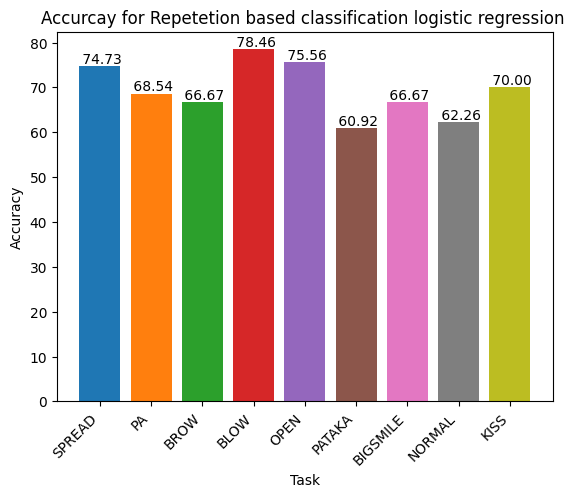

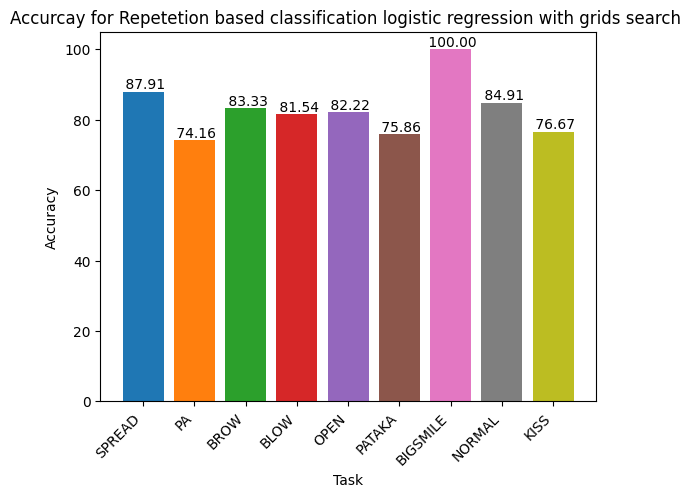

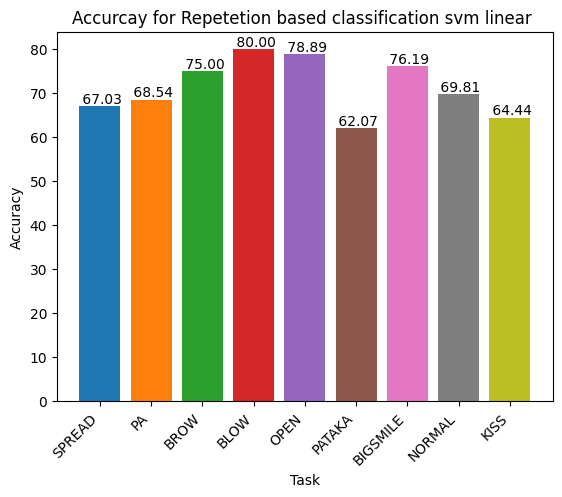

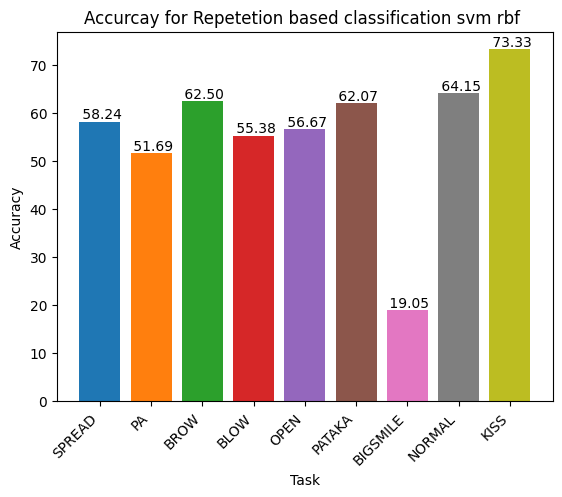

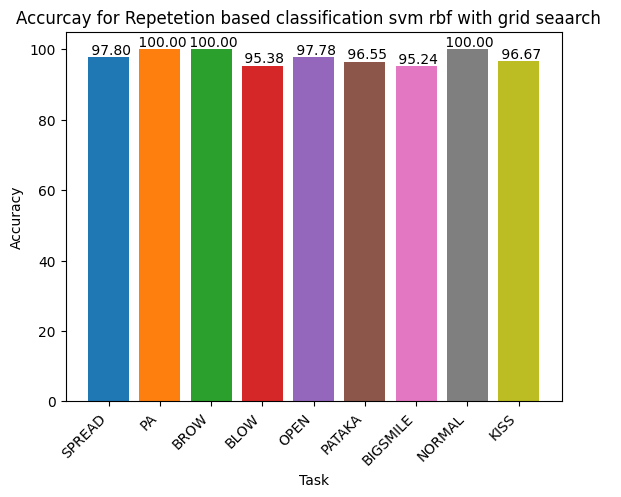

In [ ]:
result={'logistic regression':results_logistic,'logistic regression with grids search':results_logistic_grid,'svm linear':results,'svm rbf':results_svm_rbf,'svm rbf with grid seaarch ':results_svm_rbf_grid}
for name,i in result.items():
  for task, metrics in i.items():
    accuracy = metrics['Accuracy']*100
    plt.bar(task,accuracy)
    plt.text(task, accuracy, f' {accuracy:.2f}', ha='center', va='bottom')
    plt.xlabel('Task',)
  plt.ylabel('Accuracy')
  plt.xticks(rotation=45, ha='right')
  plt.title(f'Accurcay for Repetetion based classification {name} ')
  plt.show()

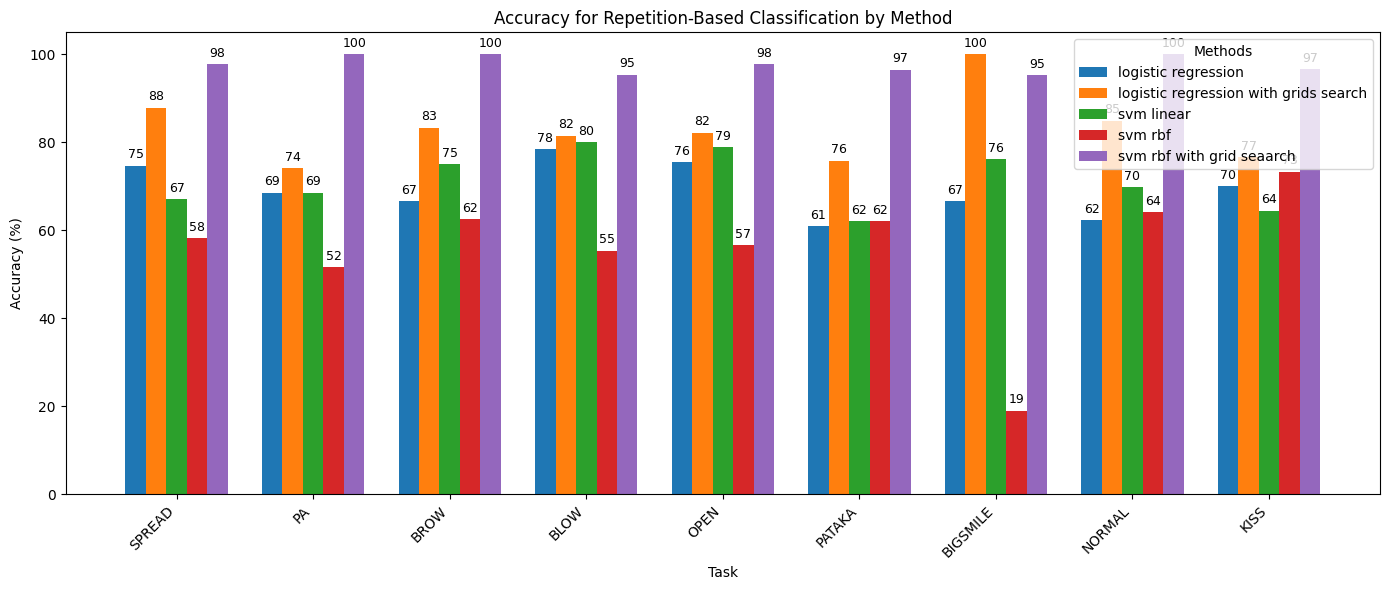

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for grouped bar chart
tasks = next(iter(result.values())).keys()  # Extract task names from one result set
methods = result.keys()  # Extract method names

# Create a dictionary to store accuracies
task_accuracies = {task: [] for task in tasks}

# Populate the dictionary with accuracies for each method
for method_name, method_results in result.items():
    for task in tasks:
        accuracy = method_results[task]['Accuracy'] * 100
        task_accuracies[task].append(accuracy)

# Create a grouped bar chart
x = np.arange(len(tasks)) * 2  # Add spacing between tasks
width = 0.3  # Bar width

plt.figure(figsize=(14, 6))  # Adjust figure size

# Plot bars for each method
for i, method_name in enumerate(methods):
    accuracies = [task_accuracies[task][i] for task in tasks]
    bars = plt.bar(x + i * width, accuracies, width, label=method_name)

    # Add accuracy values on top of bars
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 f'{acc:.0f}', ha='center', va='bottom', fontsize=9)

# Add labels, title, and legend
plt.xlabel('Task')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Repetition-Based Classification by Method')
plt.xticks(x + width * (len(methods) - 1) / 2, tasks, rotation=45, ha='right')
plt.legend(title='Methods')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
ALS_values = final_results[final_results['disease_type'] ==0]
final_result2=final_results.drop(ALS_values.index)
print(final_result2.shape)
final_result2

(747, 14)


,LLpath,Arange,Amean,Adiff,vWmax,vWmin,vLLmax,vLLmin,range_of_e,mean_of_e,r_symm,disease_type,Task_Name,Subject_ID
0,152.395692,28.065254,-32.823020,-7.917311,18.370284,6.428785,1.332419,-0.006831,0.004263,0.989645,0.984915,1,SPREAD,N004
1,160.233415,57.006664,-9.637524,-9.648731,22.838705,4.013419,2.969074,1.874726,0.002254,0.985067,0.929064,1,SPREAD,N004
2,151.528577,47.148374,-23.781802,-17.024300,24.681926,2.379753,3.269666,0.688155,0.000878,0.988587,0.958457,1,SPREAD,N004
3,155.651733,39.432462,-24.977782,-3.495013,17.894835,3.566531,1.687981,1.661038,0.002226,0.987817,0.966624,1,SPREAD,N004
4,158.751312,62.257054,-7.597097,-15.665155,21.201795,9.329976,2.847623,2.013252,0.001954,0.984738,0.879259,1,SPREAD,N004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,224.276997,161.553535,76.949135,-22.285456,7.881674,2.090404,9.693999,8.931011,0.113124,0.898200,0.985839,2,KISS,S013
1037,210.317797,60.082031,37.612238,-18.151209,0.302174,-8.510594,7.215220,4.324435,0.100860,0.923498,0.989971,2,KISS,S013
1038,181.509758,20.285999,-1.728012,-24.905847,-0.610325,-11.217336,3.357667,0.894669,0.033685,0.964582,0.991393,2,KISS,S013
1039,193.123711,18.977940,8.076369,-17.794733,-4.735273,-8.368972,3.925627,3.212659,0.071792,0.941475,0.954073,2,KISS,S013


In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()


Loo=LeaveOneOut()
model=SVC(kernel='linear')
results_svm_linear_ps={}

tasks = final_result2['Task_Name'].unique()

for task in tasks:
  print(f"\n--- Task: {task} ---")
  task_data=final_result2[final_result2['Task_Name']==task]
  x= task_data.drop(columns=['disease_type','Task_Name','Subject_ID'])
  y= task_data['disease_type']
  x_standardized=scaler.fit_transform(x)
  xs=pd.DataFrame(x_standardized,columns=x.columns)

  y_true = []
  y_pred = []




  for train_index, test_index in loo.split(xt):

    X_train, X_test = xt.iloc[train_index], xt.iloc[test_index]
    y_train, y_test = yt.iloc[train_index], yt.iloc[test_index]

    model.fit(X_train, y_train)

    y_pred.append(model.predict(X_test)[0])
    y_true.append(y_test.values[0])

  accuracy = accuracy_score(y_true, y_pred)
  conf_matrix = confusion_matrix(y_true, y_pred)

  TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
  FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
  sensitivity = TP / (TP + FN)
  specificity = TN / (TN + FP)

  results_svm_linear_ps[task] = {'Accuracy': accuracy, 'Confusion Matrix': conf_matrix, 'Sensitivity': sensitivity, 'Specificity': specificity}


  print(f"Accuracy: {accuracy:.4f}")
  print("Confusion Matrix:")
  print(conf_matrix)
  print(f"Sensitivity: {sensitivity:.4f}")
  print(f"Specificity: {specificity:.4f}")




--- Task: SPREAD ---
Accuracy: 0.7568
Confusion Matrix:
[[31 16]
 [11 53]]
Sensitivity: 0.8281
Specificity: 0.6596

--- Task: PA ---
Accuracy: 0.7568
Confusion Matrix:
[[31 16]
 [11 53]]
Sensitivity: 0.8281
Specificity: 0.6596

--- Task: BROW ---
Accuracy: 0.7568
Confusion Matrix:
[[31 16]
 [11 53]]
Sensitivity: 0.8281
Specificity: 0.6596

--- Task: BLOW ---
Accuracy: 0.7568
Confusion Matrix:
[[31 16]
 [11 53]]
Sensitivity: 0.8281
Specificity: 0.6596

--- Task: OPEN ---
Accuracy: 0.7568
Confusion Matrix:
[[31 16]
 [11 53]]
Sensitivity: 0.8281
Specificity: 0.6596

--- Task: PATAKA ---
Accuracy: 0.7568
Confusion Matrix:
[[31 16]
 [11 53]]
Sensitivity: 0.8281
Specificity: 0.6596

--- Task: BIGSMILE ---
Accuracy: 0.7568
Confusion Matrix:
[[31 16]
 [11 53]]
Sensitivity: 0.8281
Specificity: 0.6596

--- Task: NORMAL ---
Accuracy: 0.7568
Confusion Matrix:
[[31 16]
 [11 53]]
Sensitivity: 0.8281
Specificity: 0.6596

--- Task: KISS ---
Accuracy: 0.7568
Confusion Matrix:
[[31 16]
 [11 53]]
Sensit

In [22]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, GridSearchCV
import numpy as np

# Encode target labels
final_result1['disease_type'] = final_result1['disease_type'].astype('category').cat.codes

# Get unique task names
tasks = final_result1['Task_Name'].unique()

# Initialize results dictionary
results_svm_rbf_grid = {}

# Define hyperparameter ranges
param_grid = {
    'C': [2**i for i in range(-5, 16, 2)],  # C = [2^-5, 2^-3, ..., 2^15]
    'gamma': [2**i for i in range(-15, 4, 2)],  # gamma = [2^-15, 2^-13, ..., 2^3]
    'kernel': ['rbf']  # Using RBF kernel
}

for task in tasks:
    print(f"\n--- Task: {task} ---")

    # Filter data for the current task
    task_data = final_result1[final_result1['Task_Name'] == task]
    x = task_data.drop(columns=['disease_type', 'Task_Name', 'Subject_ID'])
    y = task_data['disease_type']

    # Standardize the features
    scaler = StandardScaler()
    x_standardized = scaler.fit_transform(x)

    # Leave-One-Out Cross-Validation
    loo = LeaveOneOut()

    y_true = []
    y_pred = []
    training_accuracies = []

    for train_idx, test_idx in loo.split(x_standardized):
        # Split data into training and test sets for this fold
        x_train, x_test = x_standardized[train_idx], x_standardized[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # GridSearchCV for hyperparameter tuning on training data
        grid_search = GridSearchCV(
            estimator=SVC(),
            param_grid=param_grid,
            scoring='accuracy',
            cv=None,
            verbose=0
        )
        grid_search.fit(x_train, y_train)

        # Get the best model from GridSearchCV
        best_model = grid_search.best_estimator_

        # Predict on the left-out test sample
        y_pred.append(best_model.predict(x_test)[0])
        y_true.append(y_test.values[0])
        y_train_pred = best_model.predict(x_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        training_accuracies.append(train_accuracy)


    # Compute metrics after all folds
    accuracy = accuracy_score(y_true, y_pred)
    avg_training_accuracy = np.mean(training_accuracies)
    conf_matrix = confusion_matrix(y_true, y_pred)
    TN, FP = conf_matrix[0, 0], conf_matrix[0, 1]
    FN, TP = conf_matrix[1, 0], conf_matrix[1, 1]
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    # Store results
    results_svm_rbf_grid[task] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Training Accuracy': avg_training_accuracy
    }

    # Print results for this task
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training Accuracy: {avg_training_accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")



--- Task: SPREAD ---
Accuracy: 0.8352
Training Accuracy: 0.8758
Confusion Matrix:
[[34 10]
 [ 5 42]]
Sensitivity: 0.8936
Specificity: 0.7727

--- Task: PA ---
Accuracy: 0.7640
Training Accuracy: 0.8927
Confusion Matrix:
[[27 15]
 [ 6 41]]
Sensitivity: 0.8723
Specificity: 0.6429

--- Task: BROW ---
Accuracy: 0.6667
Training Accuracy: 0.9746
Confusion Matrix:
[[ 6  6]
 [ 2 10]]
Sensitivity: 0.8333
Specificity: 0.5000

--- Task: BLOW ---
Accuracy: 0.7846
Training Accuracy: 0.9077
Confusion Matrix:
[[24  6]
 [ 8 27]]
Sensitivity: 0.7714
Specificity: 0.8000

--- Task: OPEN ---
Accuracy: 0.7444
Training Accuracy: 0.8522
Confusion Matrix:
[[31 12]
 [11 36]]
Sensitivity: 0.7660
Specificity: 0.7209

--- Task: PATAKA ---
Accuracy: 0.8391
Training Accuracy: 0.9857
Confusion Matrix:
[[34  7]
 [ 7 39]]
Sensitivity: 0.8478
Specificity: 0.8293

--- Task: BIGSMILE ---
Accuracy: 0.7143
Training Accuracy: 1.0000
Confusion Matrix:
[[8 4]
 [2 7]]
Sensitivity: 0.7778
Specificity: 0.6667

--- Task: NORMAL 

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut, GridSearchCV
from collections import Counter
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Map class indices to labels
class_mapping = dict(enumerate(final_result1['disease_type'].astype('category').cat.categories))
print(f"Class Mapping: {class_mapping}")

final_result1['Group_ID'] = final_result1['Subject_ID'].astype(str) + "_" + final_result1['Task_Name'].astype(str)

X = final_result1.drop(columns=['disease_type', 'Task_Name', 'Subject_ID', 'Group_ID'])
y = final_result1['disease_type']
task_names = final_result1['Task_Name']
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
groups = final_result1['Group_ID'].values  # Use combined Group_ID for LeaveOneGroupOut

# Define hyperparameter grid
param_grid = {
    'C': [2**i for i in range(-5, 16, 2)],    # C values from 2^-5 to 2^15
    'gamma': [2**i for i in range(-15, 4, 2)],  # Gamma values from 2^-15 to 2^3
    'kernel': ['rbf']
}

logo = LeaveOneGroupOut()
results = []

for train_index, test_index in logo.split(X_standardized_df, y, groups):
    X_train, X_test = X_standardized_df.iloc[train_index], X_standardized_df.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    task_test = task_names.iloc[test_index].values[0]  # Task name for the current test set

    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=SVC(),
        param_grid=param_grid,
        scoring='accuracy',
        cv=None,  # Inner 5-fold cross-validation
        verbose=0
    )
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    # print(f"Best Parameters for Task {task_test}: {grid_search.best_params_}")

    # Predict on the test set
    y_test_pred = best_model.predict(X_test)
    votes = Counter(y_test_pred)

    # Majority voting mechanism (in case of ties)
    top_classes = votes.most_common(2)
    if len(top_classes) > 1 and all(count == top_classes[0][1] for _, count in top_classes[:2]):
        tied_classes = [cls for cls, _ in top_classes]
        if 1 in tied_classes:
            majority_class = class_mapping[1]
        elif 2 in tied_classes:
            majority_class = class_mapping[2]
    else:
        majority_class = votes.most_common(1)[0][0]

    for true_label, pred_label in zip(y_test, [majority_class] * len(y_test)):
        results.append({
            'Task_Name': task_test,
            'True_Label': true_label,
            'Pred_Label': pred_label
        })

    # Calculate training accuracy
    # y_train_pred = best_model.predict(X_train)
    # train_accuracy = accuracy_score(y_train, y_train_pred)
    # print(f"Training Accuracy for Task {task_test}: {train_accuracy:.4f}")

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Calculate accuracy and confusion matrix for each task
task_accuracies = {}
task_conf_matrices = {}

for task in results_df['Task_Name'].unique():
    task_results = results_df[results_df['Task_Name'] == task]
    y_true = task_results['True_Label']
    y_pred = task_results['Pred_Label']

    task_accuracy = accuracy_score(y_true, y_pred)
    task_conf_matrix = confusion_matrix(y_true, y_pred, labels=list(class_mapping.values()))

    task_accuracies[task] = task_accuracy
    task_conf_matrices[task] = pd.DataFrame(
        task_conf_matrix,
        index=list(class_mapping.values()),
        columns=list(class_mapping.values())
    )

# Display results
for task, accuracy in task_accuracies.items():
    print(f"Task: {task}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(task_conf_matrices[task])
    print("\n")


Class Mapping: {0: 0, 1: 1}
